**Importing Libraries**

In [54]:
import numpy as np
import datetime
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix

**Downloading Dataset**

In [56]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.cifar10.load_data()


In [57]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


**Visialization of Dataset**

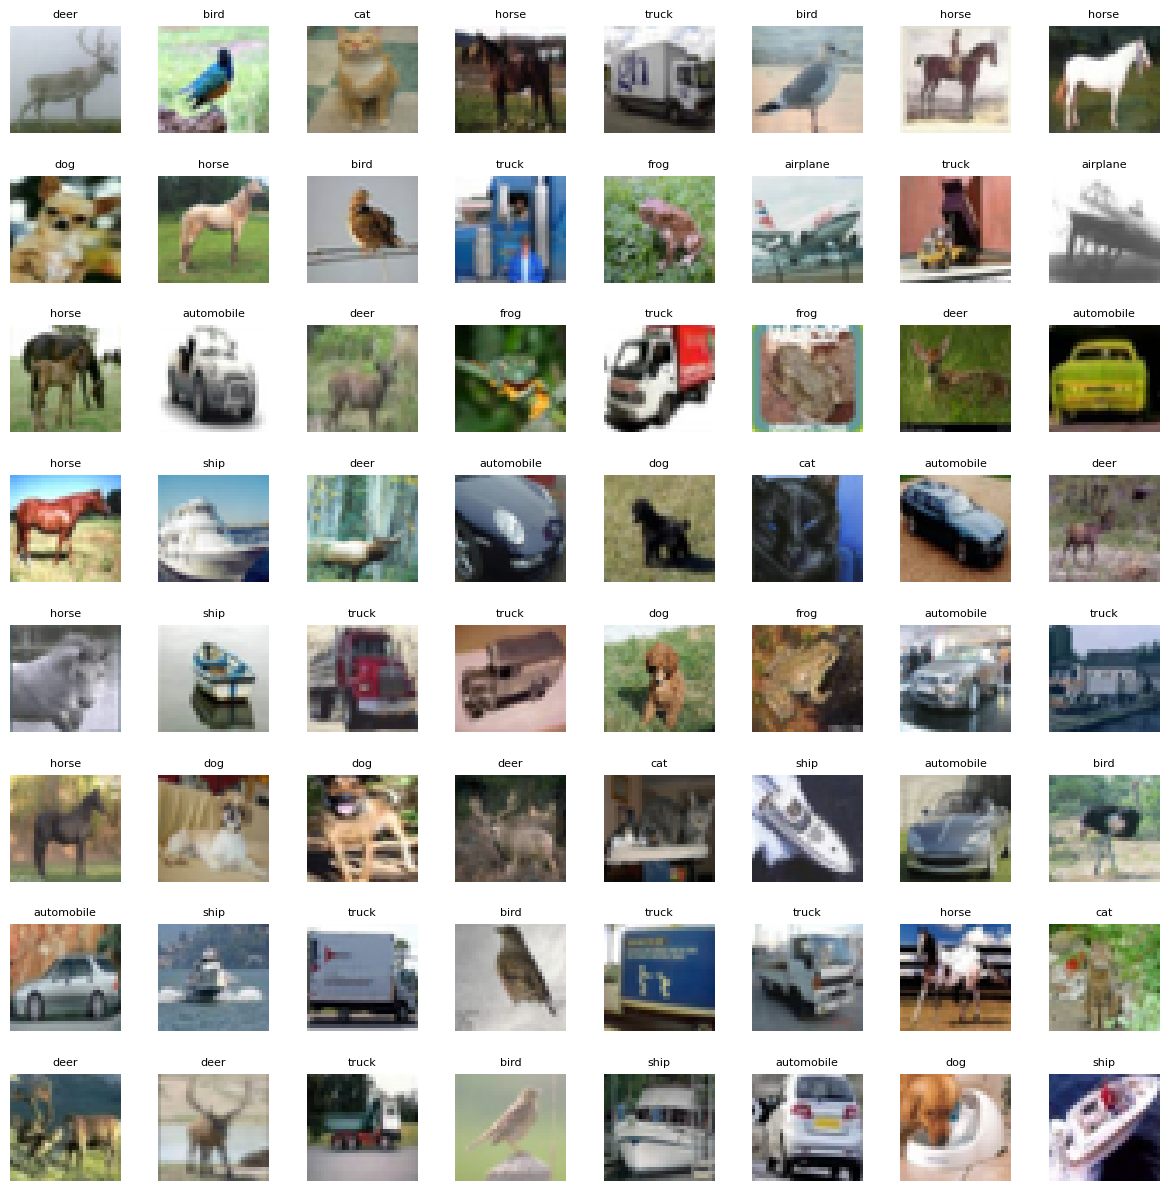

In [58]:
# Define the labels of the dataset
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']

# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 8
L_grid = 8

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (15,15))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_train = len(X_train) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index    
    axes[i].imshow(X_train[index,1:])
    label_index = int(y_train[index])
    axes[i].set_title(labels[label_index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

**Preprocessing of Dataset**

In [59]:
X_train.shape

(50000, 32, 32, 3)

In [60]:
X_train=(X_train/255).astype('float32')
X_test=(X_test/255).astype('float32')

In [61]:
#image=[]

#image.append(X_test)

In [62]:
#y_train

In [63]:
number_cat=10
y_train=tf.keras.utils.to_categorical(y_train,number_cat)
y_test=tf.keras.utils.to_categorical(y_test,number_cat)

In [64]:
#X_train
#X_train.shape

**Convolutional Neural Network**

In [65]:
cnn=tf.keras.Sequential()

cnn.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3),padding='same'))
#cnn.add(BatchNormalization())
cnn.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same'))
#cnn.add(BatchNormalization())
cnn.add(tf.keras.layers.MaxPooling2D(2,2))
cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same'))
#cnn.add(BatchNormalization())
cnn.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same'))
#cnn.add(BatchNormalization())
cnn.add(tf.keras.layers.MaxPooling2D(2,2))
cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Flatten())

#cnn.add(tf.keras.layers.Dense(1024,activation='relu'))

cnn.add(tf.keras.layers.Dense(1024,activation='relu'))
cnn.add(Dropout(0.25))

cnn.add(tf.keras.layers.Dense(10,activation='softmax'))
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 64)        36928     
                                                      

In [66]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [67]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [68]:
epochs=25
history=cnn.fit(X_train,y_train,batch_size=32 , epochs=epochs, validation_data=(X_test , y_test), callbacks=[early_stop],)

Epoch 1/25
1563/1563 [==============================] - 12s 6ms/step - loss: 1.4333 - accuracy: 0.4762 - val_loss: 1.0549 - val_accuracy: 0.6249
Epoch 2/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0255 - accuracy: 0.6357 - val_loss: 1.0330 - val_accuracy: 0.6363
Epoch 3/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8443 - accuracy: 0.6995 - val_loss: 0.8321 - val_accuracy: 0.7166
Epoch 4/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7183 - accuracy: 0.7456 - val_loss: 0.7973 - val_accuracy: 0.7238
Epoch 5/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6161 - accuracy: 0.7820 - val_loss: 0.7618 - val_accuracy: 0.7380
Epoch 6/25
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5394 - accuracy: 0.8110 - val_loss: 0.7731 - val_accuracy: 0.7495
Epoch 7/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.4658 - accuracy: 0.8349 - val_loss: 0.7923 - val_accuracy

In [69]:
evaluation=cnn.evaluate(X_test,y_test)
print('Test Accuracy {}'.format(evaluation[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.7923 - accuracy: 0.7458
Test Accuracy 0.7458000183105469


In [70]:
predicted_classes=cnn.predict(X_test)
predicted_classes

313/313 [==============================] - 1s 2ms/step


array([[3.5506540e-03, 2.5030335e-02, 1.9652300e-02, ..., 7.5499373e-03,
        1.2259028e-02, 1.8534139e-02],
       [1.5670706e-03, 1.3787302e-03, 1.9756801e-09, ..., 3.6826312e-13,
        9.9703026e-01, 2.3908811e-05],
       [1.5877815e-01, 2.4889603e-02, 3.5194107e-03, ..., 1.4274126e-03,
        6.6695440e-01, 1.3893090e-01],
       ...,
       [2.4115584e-06, 3.8128185e-06, 6.0152593e-03, ..., 7.2911638e-04,
        4.4175381e-06, 1.0614940e-06],
       [2.0533982e-03, 9.9537587e-01, 1.8438106e-04, ..., 3.7014802e-06,
        3.8344021e-07, 8.3731121e-04],
       [2.2459309e-12, 2.1471879e-14, 9.3839994e-08, ..., 9.9844319e-01,
        8.9891731e-14, 4.9351662e-11]], dtype=float32)

**Metric & Evaluation**

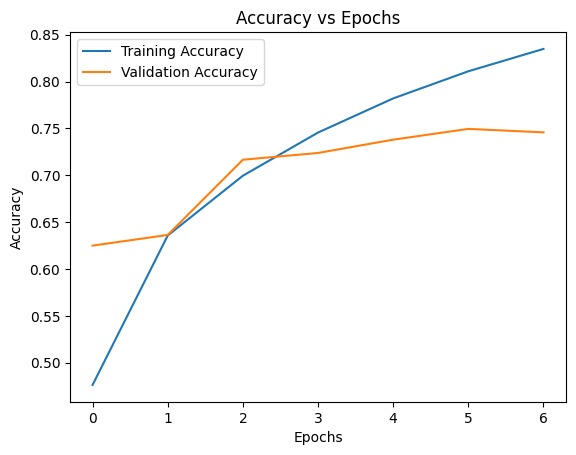

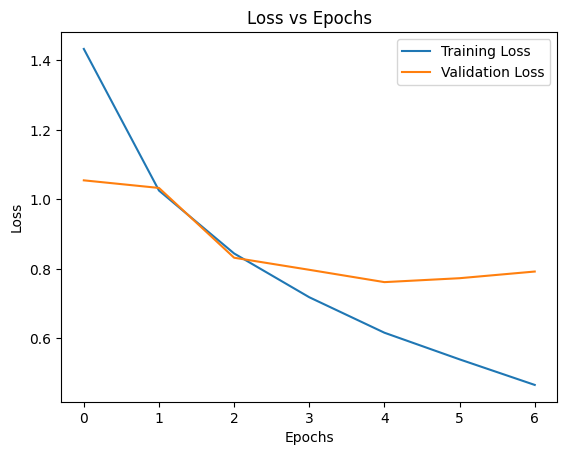

In [71]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.legend()
plt.show()

plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()
plt.show()

In [72]:
predicted_classes= predicted_classes.argmax(1)

In [73]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [74]:
y_test=y_test.argmax(1)

In [75]:
y_test

array([3, 8, 8, ..., 5, 1, 7])

**Wrongly Predicted Classes**

In [76]:
wrong_pred_idx = np.where(predicted_classes != y_test)[0]

In [77]:
print(f"Number of incorrect predictions: {len(wrong_pred_idx)}")
print("Indices of incorrect predictions: ", wrong_pred_idx)

Number of incorrect predictions: 2542
Indices of incorrect predictions:  [   3    9   25 ... 9991 9992 9995]


**Confusion Matrix**

In [79]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

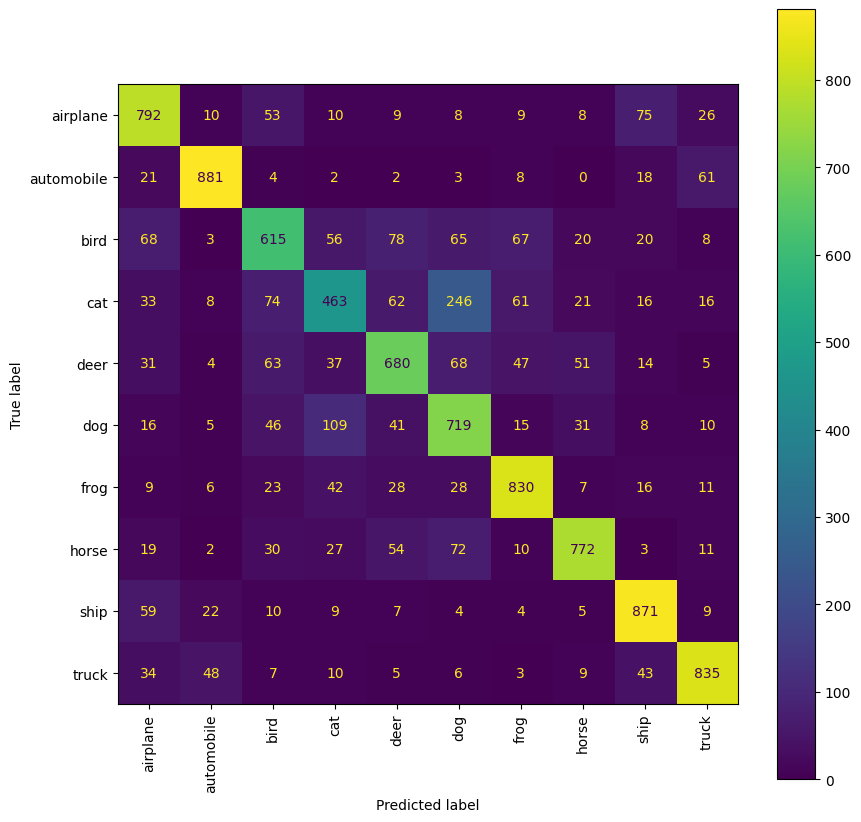

In [80]:
cm = confusion_matrix(y_test, predicted_classes)


disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)


fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax,)

plt.show()

**Classification Report**

In [81]:
print(classification_report(y_test, predicted_classes))

              precision    recall  f1-score   support

           0       0.73      0.79      0.76      1000
           1       0.89      0.88      0.89      1000
           2       0.66      0.61      0.64      1000
           3       0.61      0.46      0.52      1000
           4       0.70      0.68      0.69      1000
           5       0.59      0.72      0.65      1000
           6       0.79      0.83      0.81      1000
           7       0.84      0.77      0.80      1000
           8       0.80      0.87      0.84      1000
           9       0.84      0.83      0.84      1000

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.74     10000
weighted avg       0.75      0.75      0.74     10000



**Visualization of Results**

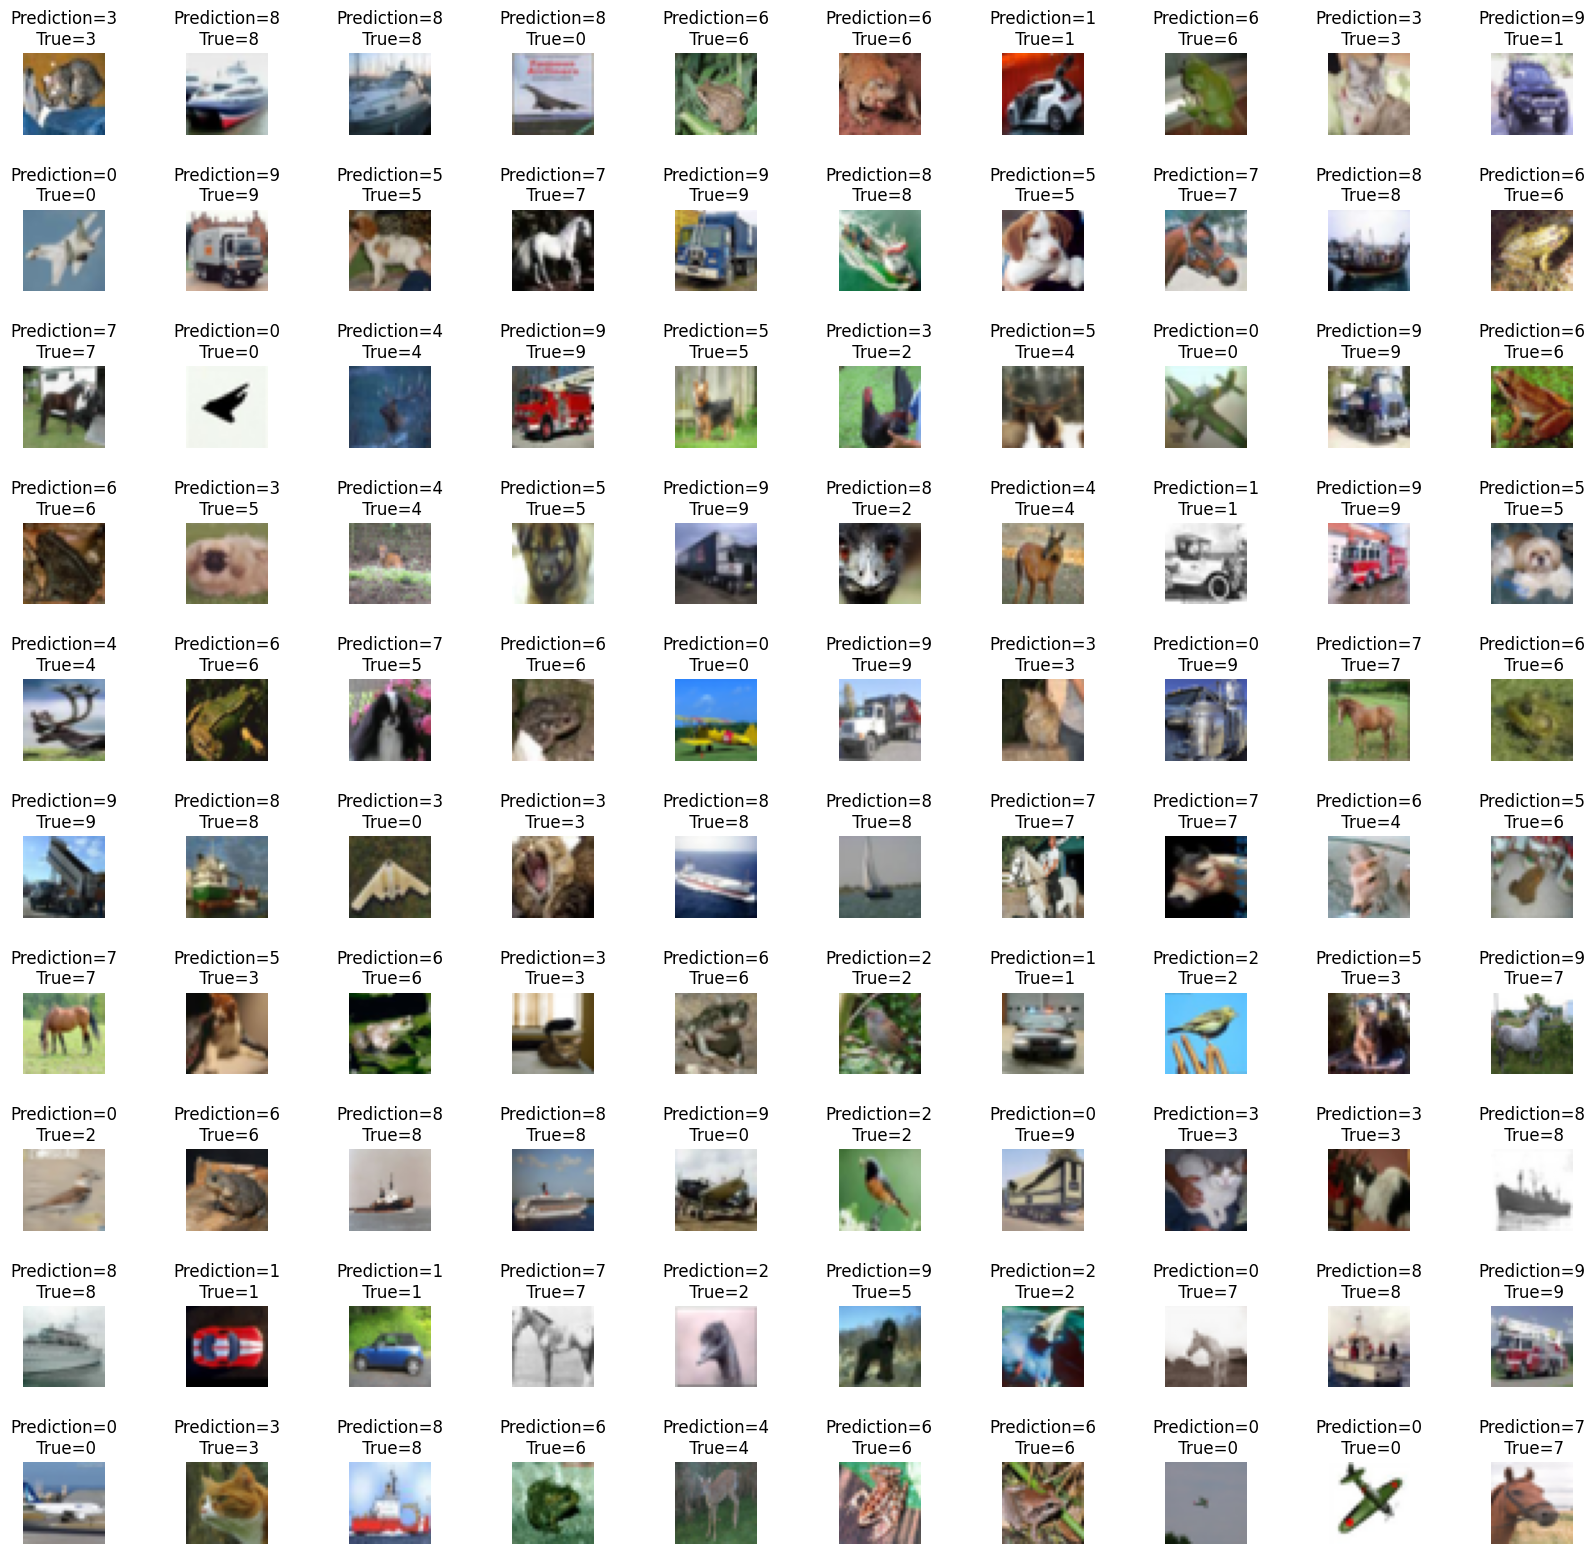

In [82]:
W=10
L=10

fig , axes =plt.subplots(W,L,figsize=(20,20))
axes=axes.ravel()

for i in np.arange(0,L*W):
  axes[i].imshow(X_test[i])
  axes[i].set_title('Prediction={}\n True={}'.format(predicted_classes[i],y_test[i]))
  axes[i].axis('off')

plt.subplots_adjust(wspace=1) 

In [83]:
#predicted_prob = tf.nn.softmax(X_test[1037])
#print(predicted_prob)

# Print the predicted class and probability
#predicted_class = tf.argmax(preds, axis=1).numpy()[0]
predicted_prob = predicted_prob.numpy()[0]
#print("Predicted class:", predicted_class)
#print("Predicted probability:", predicted_prob)

tf.Tensor(
[[[0.27897426 0.3407399  0.3802859 ]
  [0.27939007 0.3412478  0.37936214]
  [0.27939007 0.3412478  0.37936214]
  ...
  [0.2794674  0.34403    0.37650254]
  [0.27582994 0.3422258  0.38194424]
  [0.2805546  0.33999303 0.37945235]]

 [[0.2801803  0.3408736  0.37894616]
  [0.28059644 0.3413799  0.37802362]
  [0.28097185 0.34049872 0.3785294 ]
  ...
  [0.28025776 0.34365267 0.3760896 ]
  [0.2770276  0.34236655 0.38060582]
  [0.28097185 0.34049872 0.3785294 ]]

 [[0.2801803  0.3408736  0.37894616]
  [0.2801803  0.3408736  0.37894616]
  [0.27939007 0.3412478  0.37936214]
  ...
  [0.27987987 0.3445377  0.37558246]
  [0.2770276  0.34236655 0.38060582]
  [0.2813468  0.33961865 0.37903452]]

 ...

 [[0.34862804 0.33653814 0.3148338 ]
  [0.34862804 0.33653814 0.3148338 ]
  [0.34951913 0.33607778 0.31440312]
  ...
  [0.35087216 0.334743   0.31438488]
  [0.35087216 0.334743   0.31438488]
  [0.3517658  0.3342821  0.31395203]]

 [[0.34862804 0.33653814 0.3148338 ]
  [0.34862804 0.33653814 0

**Saving Model**

In [84]:
cnn.save('model.h5')

In [85]:
model=cnn.save_weights('weights.h5')

In [86]:
from keras.models import load_model

In [87]:
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input

**Saving Test Pictures in PNG format**

In [88]:
for i in range(X_test.shape[0]):
    plt.imsave(f"test_image_{i}.png", X_test[i])

**Visualizting Image ** For visualization following pictures have been used 

*   Speed Boat - 1
*   Aeroplane -1010


*   Deer - 1015
*   Dog -1019


*   Horse - 1037










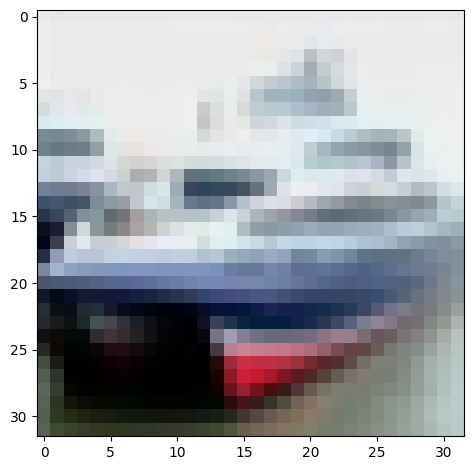

In [89]:
from skimage import io
 
img_1 = io.imread("/content/test_image_1.png")
io.imshow(img_1)





In [90]:
from keras.preprocessing import image

In [91]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Display
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm

**Defining Name of Last Convolutional Layer**

In [93]:
last_conv_layer_name = "conv2d_7"
img_size=(299,299)

In [94]:
#img_path = ("/content/test_image_1037.png")
#display(Image(img_path))

In [95]:
import numpy as np
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.applications.xception import preprocess_input, decode_predictions
from keras.models import Model, load_model
from keras.layers.core import Lambda
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img



**Loading Model**

In [96]:
model = load_model('model.h5')
#print(model)


**Reading Image from the saved Files**

In [97]:
import cv2
import numpy as np

# Load a CIFAR-10 test image
image = cv2.imread('/content/test_image_1.png')


# Resize the image to (32, 32)
img_path = cv2.resize(image, (32, 32))

#resized_image.shape

# Convert the image to float32 data type
#resized_image = resized_image.astype(np.float32)
#print(resized_image)

# Normalize the pixel values to be in the range of [0, 1]
#resized_image /= 255.0

# Add a new dimension to represent the batch size of 0
resized_image_d = np.expand_dims(img_path, axis=0)
resized_image_d.shape

# The resulting image will have shape (0, 32, 32, 3)
#print(resized_image_d.shape)



(1, 32, 32, 3)

**Grad CAM Algorithm**

In [98]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

**Preprocess the Data**

In [109]:
model.layers[-1].activation = None


preds = model.predict(resized_image_d)
#print("Prediction:", tf.argmax(preds, axis=1).numpy())


predicted_prob = tf.nn.softmax(preds)

# Print the predicted class and probability
predicted_class = tf.argmax(preds, axis=1).numpy()[0]
#predicted_prob = predicted_prob.numpy()[0]
#print("Predicted class:", predicted_class)
print("Predicted probability:", predicted_prob)

#print('Prediction={}\n True={}'.format(preds[i],y_test[i]))

1/1 [==============================] - 0s 21ms/step
Predicted probability: tf.Tensor([[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]], shape=(1, 10), dtype=float32)


**Generating HeatMaps**

In [100]:
heatmap = make_gradcam_heatmap(resized_image_d, model, last_conv_layer_name ,pred_index=9)


In [101]:
import matplotlib
import matplotlib.pyplot as plt
jet = matplotlib.colormaps.get_cmap("jet")


**Displaying HeatMaps**

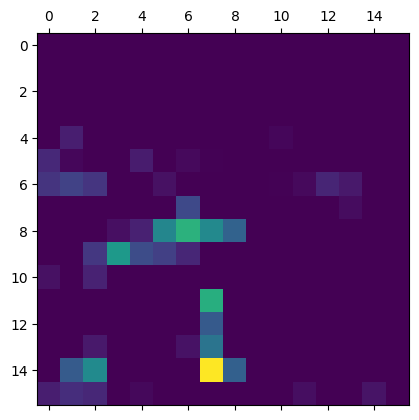

In [102]:
plt.matshow(heatmap)
plt.show()
plt.imsave('cam.jpg',heatmap)

In [103]:
from IPython.display import Image, display

In [104]:
#img = cv2.imread('/content/test_image_1037.png')

# Resize the image to (32, 32)    
#img = cv2.resize(image, (32, 32))



#print(img)
#display(Image(img))

In [105]:

#img_path.shape

(32, 32, 3)

**Super Impoose Image with HeatMap**

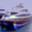

In [106]:
def save_and_display_gradcam(img_path, heatmap, cam_path="/content/cam.jpg", alpha=0.4):
   

    # Resize the image to (32, 32)    
    

    img = tf.keras.utils.array_to_img(img_path)
    img = tf.keras.utils.img_to_array(img)


    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = matplotlib.colormaps.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = tf.keras.utils.array_to_img(jet_heatmap)
    
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
 
    jet_heatmap = tf.keras.utils.img_to_array(jet_heatmap) 

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = tf.keras.utils.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))
    


save_and_display_gradcam(img_path, heatmap)
#save_and_display_gradcam(img, heatmap)


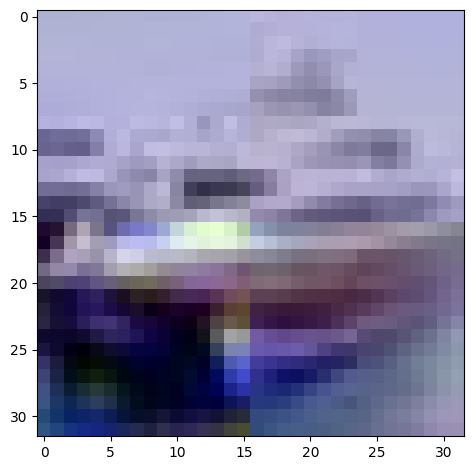

In [107]:
from skimage import io
 
img = io.imread("/content/cam.jpg")
io.imshow(img)

**End**